<center><font size = "10"> Week 5 - Single Cell Electrophysiology <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member1: Laura TESTA
<br>Group member2: Alice ALBRECHT
<br>Group member3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

In [1]:
# This will compile the mechanisms inside the MOD files (and create a new folder x86_64/special).
! nrnivmodl

/home/In silicone neurosciences/Week5/Homework
Mod files: "./NaTs2_t.mod" "./SK_E2.mod" "./SKv3_1.mod"

COBJS=''
 -> Compiling mod_func.c
x86_64-linux-gnu-gcc -O2   -I.   -I/usr/local/lib/python3.8/dist-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 => LINKING shared library ./libnrnmech.so
x86_64-linux-gnu-g++ -O2 -DVERSION_INFO='8.0.0' -std=c++11 -shared -fPIC  -I /usr/local/lib/python3.8/dist-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-soname,libnrnmech.so \
  ./mod_func.o ./NaTs2_t.o ./SK_E2.o ./SKv3_1.o  -L/usr/local/lib/python3.8/dist-packages/neuron/.data/lib -lnrniv -Wl,-rpath,/usr/local/lib/python3.8/dist-packages/neuron/.data/lib   
rm -f ./.libs/libnrnmech.so ; mkdir -p ./.libs ; cp ./libnrnmech.so ./.libs/libnrnmech.so
Successfully created x86_64/special


In [2]:
# Load usefull packages
%matplotlib inline

from neuron import h
import hoc
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
import pandas as pd
from scipy.signal import find_peaks, peak_prominences

import efel
from json2html import *
import IPython

--No graphics will be displayed.


# Optional. Stimulation protocols to study various cell properties

<font size='3'>
Your task is to design and perform two different stimulation protocols that could be used to study the AP properties (e.g. amplitude, shape, rise-time, fall-time) and passive properties (e.g. input resistance and voltage base) of the cells you have in your group folder (.asc files). When defining the cells, for the passive properties use the parameters from tutorial 01 and for the active parameters use the MOD files used in tutorial 01. Don't include any biophysics on the cell axon.

<font size='3'>Run the protocols (saving the results to a csv file - you will need those for question 3), and plot soma voltages and the current applied. Explain the motivation behind your choice of protocols - why do you think these types of protocols are usefull when studying cell behavior?
    

# <font color= 'red'>Ex1:</font>. Analysing real single cell voltage traces from patch-clamp experiments

<font size='3'>Find the voltage base, firing frequency, spike count and after-hiperpolarization depth (AHP-depth) from the recordings that you can find in your folder group (.dat files). Extract the asked features from the one or several stimulation protocols that you think you can extract the features from.

<font size='3'>You can compute it as you wish, using eFEL, scipy.signal  or creating your own functions. <font color= 'red'>[1.5 pts]

#### Traces description

* The files are named with: stimuli type (e.g. "APWaveform", "FirePattern", "IV"). 
* Sweep (repetition) number: (e.g. "APWaveform_46-51"), of increasing/decreasing amplitudes.
* Note that we have pairs of recordings with the same trace number (e.g. "exp_APWaveform_ch7_51.dat" and "exp_APWaveform_ch6_51.dat"). One of them contains the current stimulus (in this case "*ch7*") and the other the voltage response (in this case "*ch6*").
    


## First we use the FirePattern recordings

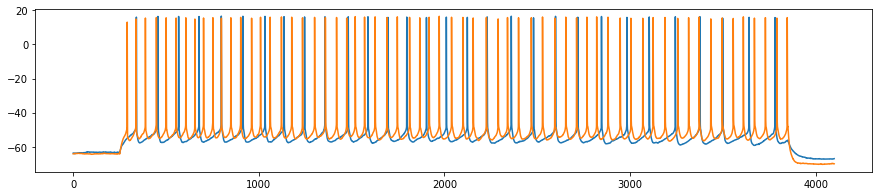

In [38]:
# Open and plot files

def get_data(fn):
    """Read  data file and formatfor plotting"""
    d = np.fromfile(fn)    
    return d[::2], d[1::2]

file_v1 = "exp_FirePattern_ch6_2048.dat"
file_v2 = "exp_FirePattern_ch6_2049.dat"

file_c1 = "exp_FirePattern_ch7_2048.dat"
file_c2 = "exp_FirePattern_ch7_2049.dat"


FILE_v = [file_v1, file_v2] 

plt.figure(figsize=(15,3))
for fv in FILE_v:
    t, v = get_data(fv)
    plt.plot(t,v)

#### Extracting features using eFEL library

In [39]:
t, v = get_data(file_v1)
t, i = get_data(file_c1)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(np.min(peaks_time))
print(np.max(peaks_time))

3398
36411


In [40]:
stim_start = 339.8 # in ms
stim_end = 3641.1
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['voltage_base', 'Spikecount', 'mean_frequency', 'AHP_depth', 'AP_amplitude', 'peak_time', 'peak_voltage', 'min_AHP_values'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

voltage_base,-51.36082733377153
Spikecount,30
mean_frequency,8.862722755046528
AHP_depth,-6.126671903289015-6.057923429167921-6.0391741921073745-5.826672666228468-5.864174955032212-5.782921903280069-5.439175717986281-6.1016741921073745-5.726674192086314-5.4579249550173685-5.351670377393212-6.520421140280284-4.926671140291511-5.357922666158537-5.239171140226659-5.032925717799195-5.489171140189612-6.389172666168847-6.301671140215731-4.957921139982496-5.6516734290073884-5.570424191845788-6.914174191823541-6.507924191697391-6.3829203771917165-7.2391711402324646-6.457921140100481-6.5016719030257235-7.532921902869695-6.451672665932918
AP_amplitude,17.27500057129803362.39999961729558563.600000379062663.1750030484180563.1187496159050262.6437492326348462.53750037403601463.368751523241162.6062488556414762.96250152308317662.9812469509116862.737501147191164.2124996203654863.8874969399860263.6812515176903163.98124884633405462.943750385951663.5000019034328562.51874733154228663.9624976945026963.7687530427921763.7124995911485664.0687522851685962.88750266421257664.1187457750085363.5437545575769662.75000191499811662.08125111517364
peak_time,340.10000000000883456.30000000003525567.9000000000606677.7000000000855797.7000000001128914.10000000013931033.1000000001561135.70000000006261246.3999999999621356.2999999998621481.79999999974781587.99999999965121695.69999999955331796.99999999946111903.09999999936462010.19999999926722123.29999999916442230.2999999990672360.1999999989492479.999999998842598.5999999987322718.6999999986232846.1999999985072983.19999999838233103.4999999982733243.9999999981453376.49999999802463499.0999999979133641.39999999778373781.2999999976564
peak_voltage,16.0312499999179516.44999885547187516.4312496175342416.38750076152348416.6312503807578216.54375076139011516.47500037848125516.3124999989917416.1499996182103616.2312507593969716.22499847344281316.25625037996556415.86874961526312316.08124922513792815.80625151320842616.04374884111751615.89999961320189416.16250036910559416.57499884639130315.62499997542122216.51250074240898515.97500034608699516.40624998058593715.88125036114370716.13749881511123316.24375149179482516.30000112922309815.41250032159055315.91875070129471215.768749176415563
min_AHP_values,-57.48749923706055-57.41875076293945-57.400001525878906-57.1875-57.22500228880374-57.1437492370516-56.80000305175781-57.462501525878906-57.087501525857846-56.8187522887889-56.712497711164744-57.881248474051816-56.28749847406304-56.71874999993007-56.59999847399819-56.39375305157073-56.84999847396114-57.74999999994038-57.66249847398726-56.31874847375403-57.01250076277892-56.93125152561732-58.27500152559507-57.86875152546892-57.74374771096325-58.599998474003996-57.81874847387201-57.862499236797255-58.89374923664123-57.81249999970445


Text(0, 0.5, 'voltage (mV)')

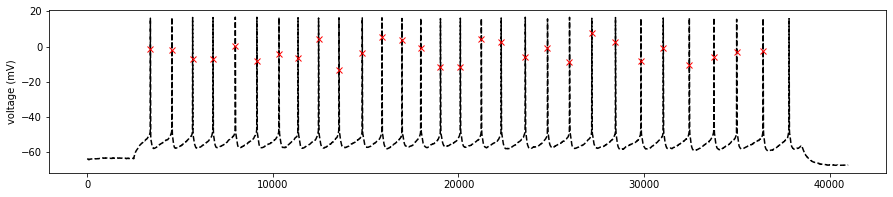

In [41]:
# Plot
plt.figure(figsize=(15,3))
plt.plot(v,'k--')
plt.plot(peaks_time, v[peaks_time], 'rx')
plt.ylabel('voltage (mV)')

In [42]:
t, v = get_data(file_v2)
t, i = get_data(file_c2)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(np.min(peaks_time))
print(np.max(peaks_time))

2904
37909


In [43]:
stim_start = 290.4 # in ms
stim_end = 3790.9
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['voltage_base', 'Spikecount', 'mean_frequency', 'AHP_depth', 'AP_amplitude', 'peak_time', 'peak_voltage', 'min_AHP_values'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

voltage_base,-53.47472088280086
Spikecount,63
mean_frequency,17.73823024805628
AHP_depth,-1.456530643077457-1.7127791171991404-1.7752791171991404-1.43778140601749983.2434701198700183.430973934565948-1.7252798801385936-1.175276828365007-1.29402835425968733.9184731716321224-1.1002798801312963-1.244029117175117-1.7252798801385936-0.76902682837118874.643471645740313-1.3440314060103802-1.2065306430743377-1.8065291171981173-1.5565291171883402-0.9752798801385936-2.0065298801286744-1.925280643038441-0.41277988012231503-1.0690298801385936-1.0252791171991404-2.537779880113476-0.9065275912916491-1.856528354132827-1.3940306430068432-1.1252814060174998-0.937781405934281-1.7565260652178196-1.4127798801385936-1.9127760652337855-1.369029116978723-2.1627798800199542-0.1190291171366269-1.7002783542596873-1.9627791171991404-1.6877775912473254-2.3252783542596873-1.0002775910794526-1.637782168956953-1.2815314060174998-0.6440306427186613-2.1752806427059284-2.3877783540665263-1.8190298797380535-1.9627791168885338-1.6815291168775346-1.6252775913202342-2.8940306427366593-1.0815268281455062-1.3940306428358227-3.0252791170745823-1.6565314057615552-1.8565283541281872-0.9627791169295179-2.2752791171991404-1.1627798799973164-2.3315306429333873-1.95652682808441375.199723171619219
AP_amplitude,13.50625038173761561.9500007626781162.39374923609922561.82500076148012661.9437503792139861.26874923510137461.54375075931433563.5375022868861762.44999885388689661.6812515237610961.1874980887288561.37499999337842462.3249988532818363.0062503754867162.262500757515362.2875003751243862.63750266785899661.8625030507081762.4875011445582862.93124961700715462.7000007604050261.3437500014884762.0375003824532362.90624999956031663.0374984701690462.2875003807429463.3250007602846962.0937519101391962.30624961928257563.37499808357035463.4874992388790862.8500022849723863.0999984693711962.050001144755261.9312477195434162.9562492296195263.1374988339993462.4625034330238162.9687537989309262.5750007482124263.40000150532945662.7124977121196563.26875112372107462.05624963094905462.58749962189601563.06875037613191662.3624992323796163.46875000772228563.7062492034845262.9250030220757662.562499997806763.9250011418103962.2937488660791763.59999848395689563.0125007568955563.5937519206581663.90624806685096463.6125011474789563.1312503755833162.1499996265084662.26249886935677
peak_time,290.7999999999976338.40000000000845388.8000000000199447.90000000003334500.6000000000453554.2000000000575606.7000000000694655.4000000000805702.1000000000911752.5000000001025798.1000000001129849.2000000001245902.2000000001366961.000000000151009.10000000016091060.80000000013071121.70000000007531177.1000000000251235.2999999999721300.39999999991281358.499999999861418.7999999998051473.39999999975541519.39999999971361569.5999999996681626.49999999961621689.69999999955871746.09999999950741812.19999999944731866.99999999939751917.49999999935151971.9999999993022038.29999999924172099.6999999991862154.89999999913562225.9999999990712289.29999999901342339.79999999896752399.29999999891332467.9999999988512528.4999999987962594.69999999873562653.7999999986822711.9999999986292767.7999999985782820.29999999853042881.2999999984752947.0999999984153004.69999999836273068.69999999830453124.3999999982543188.49999999819563256.89999999813343315.699999998083372.4999999980283435.1999999979713496.49999999791543556.09999999786123610.49999999781183670.19999999775753729.29999999770373791.29999999764733847.0999999975966
peak_voltage,13.09374999998343714.95000076290580215.49999999956479315.81249999936502315.63125038052966415.53124999985288215.64374923557387814.91875076233160515.53750038116807815.6874999995000915.39999961832565815.65000152328023715.91250038133318915.39999961631846815.95624923524074215.99374961619329816.1437511437177215.9999999996344415.6125011442206315.89999961642934215.7999992335940115.82500076202498515.46249961672595116.3437499964367716.0624999933976716.19375037672011415.78124999296626616.19375037789751215.89999961303736815.61874960482248515.956

Text(0, 0.5, 'voltage (mV)')

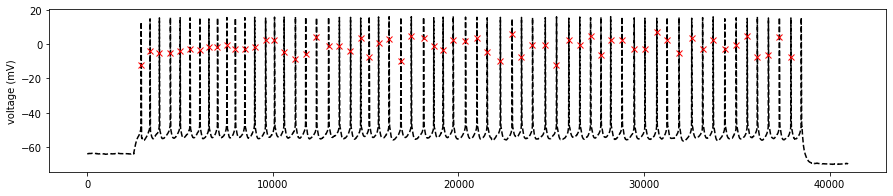

In [44]:
# Plot
plt.figure(figsize=(15,3))
plt.plot(v,'k--')
plt.plot(peaks_time, v[peaks_time], 'rx')
plt.ylabel('voltage (mV)')

## Then we use the APWaveform recordings

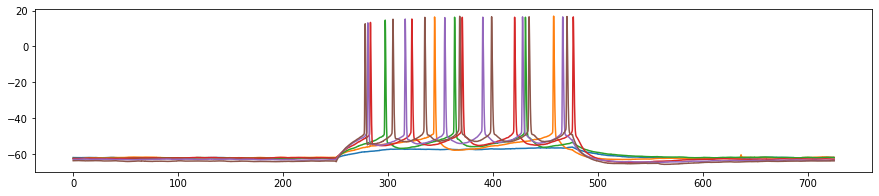

In [45]:
# Open and plot files

def get_data(fn):
    """Read  data file and formatfor plotting"""
    d = np.fromfile(fn)    
    return d[::2], d[1::2]

file_v1 = "exp_APWaveform_ch6_2042.dat"
file_v2 = "exp_APWaveform_ch6_2043.dat"
file_v3 = "exp_APWaveform_ch6_2044.dat"
file_v4 = "exp_APWaveform_ch6_2045.dat"
file_v5 = "exp_APWaveform_ch6_2046.dat"
file_v6 = "exp_APWaveform_ch6_2047.dat"

file_c1 = "exp_APWaveform_ch7_2042.dat"
file_c2 = "exp_APWaveform_ch7_2043.dat"
file_c3 = "exp_APWaveform_ch7_2044.dat"
file_c4 = "exp_APWaveform_ch7_2045.dat"
file_c5 = "exp_APWaveform_ch7_2046.dat"
file_c6 = "exp_APWaveform_ch7_2047.dat"


FILE_v = [file_v1, file_v2, file_v3, file_v4, file_v5, file_v6] 

plt.figure(figsize=(15,3))
for fv in FILE_v:
    t, v = get_data(fv)
    plt.plot(t,v)

In [46]:
t, v = get_data(file_v1)
t, i = get_data(file_c1)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)
print(peaks_time)

[]


There are no peaks for this recording

In [47]:
t, v = get_data(file_v2)
t, i = get_data(file_c2)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(np.min(peaks_time))
print(np.max(peaks_time))

17197
22870


In [48]:
stim_start = 1719.7 # in ms
stim_end = 2287.0
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['voltage_base', 'Spikecount', 'mean_frequency', 'AHP_depth', 'peak_time', 'peak_voltage', 'min_AHP_values'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

voltage_base,-59.53202233553286
Spikecount,2
mean_frequency,-0.0
AHP_depth,1.68827233554166871.932020046739197
peak_time,344.3000000000098457.7000000000356
peak_voltage,16.24999999988389716.912500381369647
min_AHP_values,-57.84374999999119-57.60000228879366


We use scipy to compute the amplitudes because the eEFL library raises a signal. 

Voltage peaks: [-2.1937503814697266, 1.7249994277954102]


Amplitudes of action potentials: [0. 0.] 


Times of peak occurences: [17197 22870]


/tmp/ipykernel_41/2926834380.py:2: PeakPropertyWarning: some peaks have a prominence of 0
  amplitudes = peak_prominences(v, peaks_time, wlen=40)[0]


Text(0, 0.5, 'voltage (mV)')

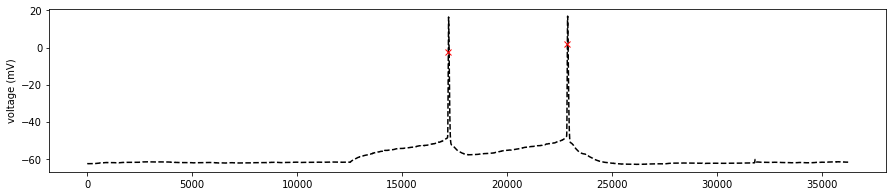

In [49]:
# Amplitudes and peak locations
amplitudes = peak_prominences(v, peaks_time, wlen=40)[0]

voltage_peaks = []
for x in peaks_time:
    volt_p = v[x]
    voltage_peaks.append(volt_p)
    
#Print results   
print("Voltage peaks: %s" %voltage_peaks)
print('\n')
print ("Amplitudes of action potentials: %s " % amplitudes)
print('\n')
print("Times of peak occurences: %s" % peaks_time)

# Plot
plt.figure(figsize=(15,3))
plt.plot(v,'k--')
plt.plot(peaks_time, v[peaks_time], 'rx')
plt.ylabel('voltage (mV)')

In [50]:
t, v = get_data(file_v3)
t, i = get_data(file_c3)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(np.min(peaks_time))
print(np.max(peaks_time))

14844
21529


In [51]:
stim_start = 1484.4
stim_end = 2152.9
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['voltage_base', 'Spikecount', 'mean_frequency', 'AHP_depth', 'peak_time', 'peak_voltage', 'min_AHP_values'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

voltage_base,-58.99378276295557
Spikecount,3
mean_frequency,-0.0
AHP_depth,5.04378581471348753.4625327629714492.7875335259054665
peak_time,297.1999999999991363.3000000000141430.80000000002946
peak_voltage,14.49999999998692616.006250381610716.212499618640692
min_AHP_values,-53.94999694824208-55.53124999998412-56.2062492370501


Voltage peaks: [-8.5625, 2.481250762939453, 6.350000381469727]


Amplitudes of action potentials: [0. 0. 0.] 


Times of peak occurences: [14844 18153 21529]


/tmp/ipykernel_41/2926834380.py:2: PeakPropertyWarning: some peaks have a prominence of 0
  amplitudes = peak_prominences(v, peaks_time, wlen=40)[0]


Text(0, 0.5, 'voltage (mV)')

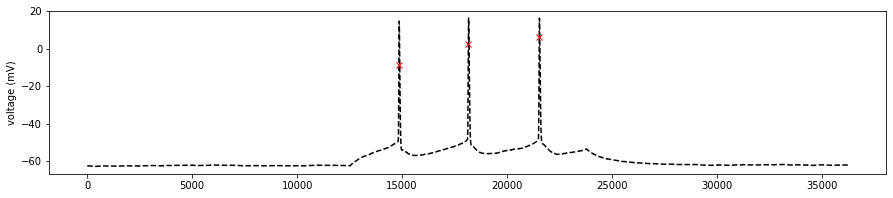

In [52]:
# Amplitudes and peak locations
amplitudes = peak_prominences(v, peaks_time, wlen=40)[0]

voltage_peaks = []
for x in peaks_time:
    volt_p = v[x]
    voltage_peaks.append(volt_p)
    
#Print results   
print("Voltage peaks: %s" %voltage_peaks)
print('\n')
print ("Amplitudes of action potentials: %s " % amplitudes)
print('\n')
print("Times of peak occurences: %s" % peaks_time)

# Plot
plt.figure(figsize=(15,3))
plt.plot(v,'k--')
plt.plot(peaks_time, v[peaks_time], 'rx')
plt.ylabel('voltage (mV)')

In [53]:
t, v = get_data(file_v4)
t, i = get_data(file_c4)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(np.min(peaks_time))
print(np.max(peaks_time))

14143
21013


In [54]:
stim_start = 1414.3 # in ms
stim_end = 2101.3
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['voltage_base', 'Spikecount', 'mean_frequency', 'AHP_depth', 'peak_time', 'peak_voltage', 'min_AHP_values'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

voltage_base,-58.96024597892982
Spikecount,5
mean_frequency,-0.0
AHP_depth,4.2602452159880934.30399597893218563.76649750482678774.253996741878865-4.564755546905552
peak_time,283.1999999999959322.60000000000485370.7000000000158420.5000000000271476.4000000000398
peak_voltage,13.25000000003069515.18124961856047216.06249999982222216.1312503816646116.437500000087038
min_AHP_values,-54.70000076294173-54.656249999997634-55.19374847410303-54.706249237050955-63.52500152583537


Voltage peaks: [-5.293749809265137, 2.4937515258789062, 1.2312498092651367, 3.918750762939453]


Amplitudes of action potentials: [0. 0. 0. 0.] 


Times of peak occurences: [14143 16118 18518 21013]


/tmp/ipykernel_41/2926834380.py:2: PeakPropertyWarning: some peaks have a prominence of 0
  amplitudes = peak_prominences(v, peaks_time, wlen=40)[0]


Text(0, 0.5, 'voltage (mV)')

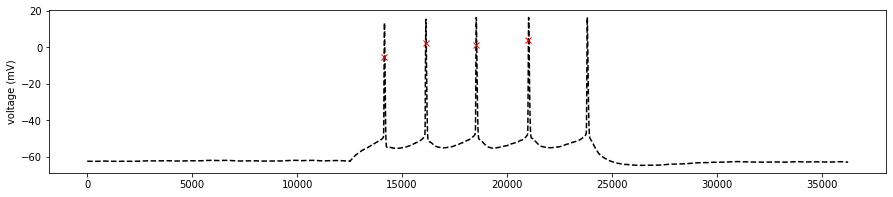

In [55]:
# Amplitudes and peak locations
amplitudes = peak_prominences(v, peaks_time, wlen=40)[0]

voltage_peaks = []
for x in peaks_time:
    volt_p = v[x]
    voltage_peaks.append(volt_p)
    
#Print results   
print("Voltage peaks: %s" %voltage_peaks)
print('\n')
print ("Amplitudes of action potentials: %s " % amplitudes)
print('\n')
print("Times of peak occurences: %s" % peaks_time)

# Plot
plt.figure(figsize=(15,3))
plt.plot(v,'k--')
plt.plot(peaks_time, v[peaks_time], 'rx')
plt.ylabel('voltage (mV)')

In [56]:
t, v = get_data(file_v5)
t, i = get_data(file_c5)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(np.min(peaks_time))
print(np.max(peaks_time))

14021
23304


In [57]:
stim_start = 1402.1 # in ms
stim_end = 2330.4
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['voltage_base', 'Spikecount', 'mean_frequency', 'AHP_depth', 'peak_time', 'peak_voltage', 'min_AHP_values'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

voltage_base,-59.18880249934156
Spikecount,6
mean_frequency,-0.0
AHP_depth,4.71380402521787547.2138040252204695.1325509734626565.6450517364166055.3388040252305237.032552499341563
peak_time,280.6999999999953316.3000000000034354.000000000012390.2000000000202428.10000000002884466.40000000003755
peak_voltage,13.16250038146244315.16250038142922616.09999847412109416.2687492371174616.42499923679937316.393749236697108
min_AHP_values,-54.47499847412369-51.974998474121094-54.056251525878906-53.54375076292496-53.84999847411104-52.15625


Voltage peaks: [-1.1187496185302734, -4.0, -0.08750057220458984, -4.8125, -3.8812503814697266, 2.9937496185302734]


Amplitudes of action potentials: [0. 0. 0. 0. 0. 0.] 


Times of peak occurences: [14021 15797 17685 19493 21386 23304]


/tmp/ipykernel_41/2926834380.py:2: PeakPropertyWarning: some peaks have a prominence of 0
  amplitudes = peak_prominences(v, peaks_time, wlen=40)[0]


Text(0, 0.5, 'voltage (mV)')

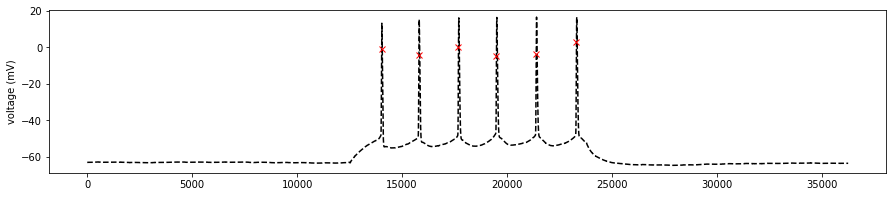

In [58]:
# Amplitudes and peak locations
amplitudes = peak_prominences(v, peaks_time, wlen=40)[0]

voltage_peaks = []
for x in peaks_time:
    volt_p = v[x]
    voltage_peaks.append(volt_p)
    
#Print results   
print("Voltage peaks: %s" %voltage_peaks)
print('\n')
print ("Amplitudes of action potentials: %s " % amplitudes)
print('\n')
print("Times of peak occurences: %s" % peaks_time)

# Plot
plt.figure(figsize=(15,3))
plt.plot(v,'k--')
plt.plot(peaks_time, v[peaks_time], 'rx')
plt.ylabel('voltage (mV)')

In [59]:
t, v = get_data(file_v6)
t, i = get_data(file_c6)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(np.min(peaks_time))
print(np.max(peaks_time))

13895
23508


In [60]:
stim_start = 1389.5 # in ms
stim_end = 2350.8
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['voltage_base', 'Spikecount', 'mean_frequency', 'AHP_depth', 'peak_time', 'peak_voltage', 'min_AHP_values'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

voltage_base,-59.366201183086844
Spikecount,7
mean_frequency,-0.0
AHP_depth,4.5849511830898287.9661996572079379.9912011830868447.0224511830978936.3662011830868446.46620347193621810.11620118311157
peak_time,278.19999999999476304.60000000000076335.0000000000077368.2000000000152398.60000000002213434.30000000003025470.40000000003846
peak_voltage,12.2562503815367315.05624961853512316.1437511443348416.81874847411633316.55624961853718316.54375076289220216.66249847414511
min_AHP_values,-54.781249999997016-51.400001525878906-49.375-52.34374999998895-53.0-52.899997711150625-49.24999999997527


Voltage peaks: [0.5, -1.4375, -1.5562496185302734, 1.9687490463256836, -0.4812498092651367, 2.0687484741210938, 7.368749618530273]


Amplitudes of action potentials: [0. 0. 0. 0. 0. 0. 0.] 


Times of peak occurences: [13895 15216 16732 18395 19914 21700 23508]


/tmp/ipykernel_41/2926834380.py:2: PeakPropertyWarning: some peaks have a prominence of 0
  amplitudes = peak_prominences(v, peaks_time, wlen=40)[0]


Text(0, 0.5, 'voltage (mV)')

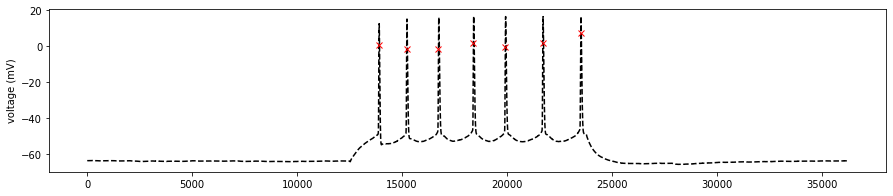

In [61]:
# Amplitudes and peak locations
amplitudes = peak_prominences(v, peaks_time, wlen=40)[0]

voltage_peaks = []
for x in peaks_time:
    volt_p = v[x]
    voltage_peaks.append(volt_p)
    
#Print results   
print("Voltage peaks: %s" %voltage_peaks)
print('\n')
print ("Amplitudes of action potentials: %s " % amplitudes)
print('\n')
print("Times of peak occurences: %s" % peaks_time)

# Plot
plt.figure(figsize=(15,3))
plt.plot(v,'k--')
plt.plot(peaks_time, v[peaks_time], 'rx')
plt.ylabel('voltage (mV)')

## Finally we use the IV recordings

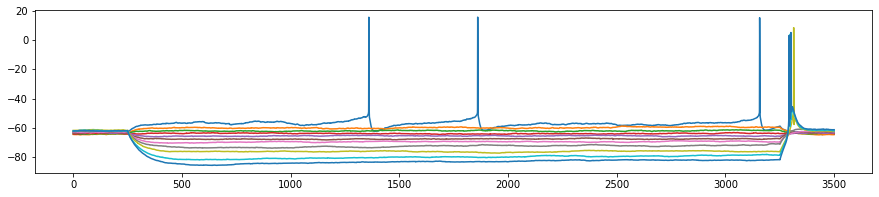

In [62]:
# Open and plot files

def get_data(fn):
    """Read  data file and formatfor plotting"""
    d = np.fromfile(fn)    
    return d[::2], d[1::2]

file_v1 = "exp_IV_ch6_2031.dat"
file_v2 = "exp_IV_ch6_2032.dat"
file_v3 = "exp_IV_ch6_2033.dat"
file_v4 = "exp_IV_ch6_2034.dat"
file_v5 = "exp_IV_ch6_2035.dat"
file_v6 = "exp_IV_ch6_2036.dat"
file_v7 = "exp_IV_ch6_2037.dat"
file_v8 = "exp_IV_ch6_2038.dat"
file_v9 = "exp_IV_ch6_2039.dat"
file_v10 = "exp_IV_ch6_2040.dat"
file_v11 = "exp_IV_ch6_2041.dat"

file_c1 = "exp_IV_ch7_2031.dat"
file_c2 = "exp_IV_ch7_2032.dat"
file_c3 = "exp_IV_ch7_2033.dat"
file_c4 = "exp_IV_ch7_2034.dat"
file_c5 = "exp_IV_ch7_2035.dat"
file_c6 = "exp_IV_ch7_2036.dat"
file_c7 = "exp_IV_ch7_2037.dat"
file_c8 = "exp_IV_ch7_2038.dat"
file_c9 = "exp_IV_ch7_2039.dat"
file_c10 = "exp_IV_ch7_2040.dat"
file_c11 = "exp_IV_ch7_2041.dat"


FILE_v = [file_v1, file_v2, file_v3, file_v4, file_v5, file_v6, file_v7, file_v8, file_v9, file_v10, file_v11] 

plt.figure(figsize=(15,3))
for fv in FILE_v:
    t, v = get_data(fv)
    plt.plot(t,v)

In [63]:
t, v = get_data(file_v1)
t, i = get_data(file_c1)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(np.min(peaks_time))
print(np.max(peaks_time))

13593
18600


In [64]:
stim_start = 1359.3 # in ms
stim_end = 1860.0
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['voltage_base', 'Spikecount', 'mean_frequency', 'AHP_depth', 'AP_amplitude', 'peak_time', 'peak_voltage', 'min_AHP_values'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

voltage_base,-54.16149362681532
Spikecount,3
mean_frequency,3333.3333349001905
AHP_depth,-8.157258662003038-7.419759424826893-7.1197563731846785
AP_amplitude,9.456251154614263
peak_time,1359.5999999998591860.39999999940353157.199999998224
peak_voltage,15.78124999593170415.86250113728692515.443750345167743
min_AHP_values,-62.31875228881836-61.581253051642214-61.28125


Text(0, 0.5, 'voltage (mV)')

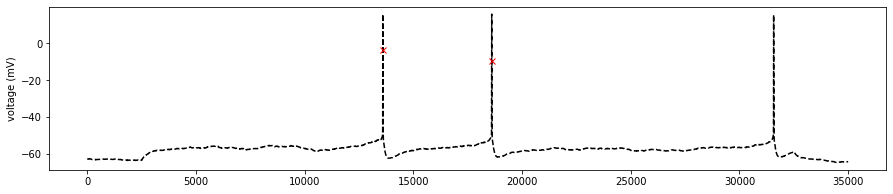

In [65]:
# Plot
plt.figure(figsize=(15,3))
plt.plot(v,'k--')
plt.plot(peaks_time, v[peaks_time], 'rx')
plt.ylabel('voltage (mV)')

In [66]:
t, v = get_data(file_v2)
t, i = get_data(file_c2)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(peaks_time)

[]


There are no peaks for this recording

In [67]:
t, v = get_data(file_v3)
t, i = get_data(file_c3)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(peaks_time)

[]


In [68]:
t, v = get_data(file_v4)
t, i = get_data(file_c4)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(peaks_time)

[]


In [69]:
t, v = get_data(file_v5)
t, i = get_data(file_c5)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(peaks_time)

[]


In [70]:
t, v = get_data(file_v6)
t, i = get_data(file_c6)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(peaks_time)

[]


In [71]:
t, v = get_data(file_v7)
t, i = get_data(file_c7)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(peaks_time)

[]


In [72]:
t, v = get_data(file_v8)
t, i = get_data(file_c8)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(peaks_time)

[]


In [74]:
t, v = get_data(file_v9)
t, i = get_data(file_c9)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(np.min(peaks_time))
print(np.max(peaks_time))

33135
33135


In [78]:
stim_start = 3310 # in ms
stim_end = 3320
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['voltage_base', 'Spikecount', 'mean_frequency', 'AHP_depth', 'AP_amplitude', 'peak_time', 'peak_voltage', 'min_AHP_values'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

voltage_base,-74.60830620494197
Spikecount,1
mean_frequency,263.1578948696951
AHP_depth,16.8020546791831
AP_amplitude,55.756250362997214
peak_time,3313.7999999980816
peak_voltage,8.637498810983878
min_AHP_values,-57.80625152575887


Text(0, 0.5, 'voltage (mV)')

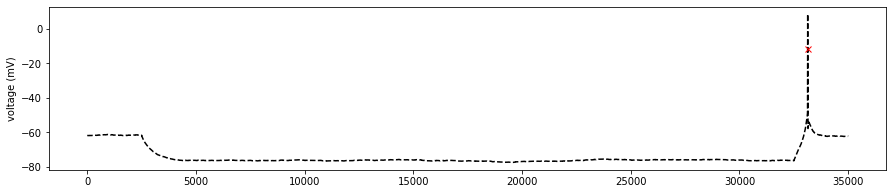

In [79]:
# Plot
plt.figure(figsize=(15,3))
plt.plot(v,'k--')
plt.plot(peaks_time, v[peaks_time], 'rx')
plt.ylabel('voltage (mV)')

In [81]:
t, v = get_data(file_v10)
t, i = get_data(file_c10)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(np.min(peaks_time))
print(np.max(peaks_time))

32949
32995


In [82]:
stim_start = 3294.9 # in ms
stim_end = 3299.5
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['voltage_base', 'Spikecount', 'mean_frequency', 'AHP_depth', 'AP_amplitude', 'peak_time', 'peak_voltage', 'min_AHP_values'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

voltage_base,-77.52444251038312
Spikecount,2
mean_frequency,2500.0000118853904
AHP_depth,18.3681925191829722.886941749827756
AP_amplitude,15.44374966866567
peak_time,3295.29999999809843299.7999999980943
peak_voltage,3.6437492349210894.7999992054950065
min_AHP_values,-59.156249991200156-54.63750076055537


Text(0, 0.5, 'voltage (mV)')

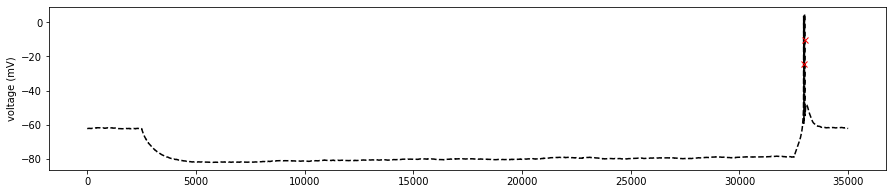

In [83]:
# Plot
plt.figure(figsize=(15,3))
plt.plot(v,'k--')
plt.plot(peaks_time, v[peaks_time], 'rx')
plt.ylabel('voltage (mV)')

In [84]:
t, v = get_data(file_v11)
t, i = get_data(file_c11)

# Look for start and end time
peaks_time, _ = find_peaks(i, prominence=1, height=-20)

print(np.min(peaks_time))
print(np.max(peaks_time))

32922
32958


In [85]:
stim_start = 3292.2 # in ms
stim_end = 3295.8
trace = {'T': t, 'V': v, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.getFeatureValues([trace], ['voltage_base', 'Spikecount', 'mean_frequency', 'AHP_depth', 'AP_amplitude', 'peak_time', 'peak_voltage', 'min_AHP_values'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

voltage_base,-80.95100772463863
Spikecount,3
mean_frequency,3333.3333544315897
AHP_depth,22.6822584933979827.15726077675343231.882259250756178
AP_amplitude,50.08749767476583
peak_time,3292.4999999981013296.09999999809773300.9999999980932
peak_voltage,3.2312507114283910.81875034353537385.300001138093029
min_AHP_values,-58.26874923124065-53.7937469478852-49.06874847388245


Text(0, 0.5, 'voltage (mV)')

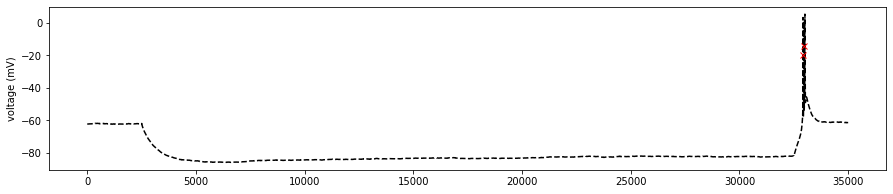

In [86]:
# Plot
plt.figure(figsize=(15,3))
plt.plot(v,'k--')
plt.plot(peaks_time, v[peaks_time], 'rx')
plt.ylabel('voltage (mV)')

# <font color= 'red'>Ex2:</font> Combine Ex 1 and Ex 2

<font size='3'> Now let's do some electrophysiological analysis on both cells from your group folder that you have used in exercise 1. Examine your plots for the two protocols you have defined and select 2 or 3 eFeatures to help you identify differences between your two cells. Would you be able to classify the cells based on these eFeatures ? Explain your choice of features and your observations. <font color= 'red'>[2.5 pts]    
 

# 1. Get the dataframes and plots for both cells and both protocols

## Cell 1

In [3]:
# Define NEURON_1 class with specific morphology and channel behavior
class NEURON_1:
    def __init__(self):
        self.build_morphology()
        self.define_biophysics()
        
    def build_morphology(self):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file('stdlib.hoc')
        h.load_file("import3d.hoc")
        #cell = h.Import3d_SWC_read() # We have a .swc morphology file
        cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input('Cell1_g3.asc')

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell,0)
        self.importedcell.instantiate(None) 

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.basal = []
        self.apical = []
        #self.axonal = [] # for the moment we will forget about the axon
        self.all = []
        for sec in h.allsec():
            #print (sec)
            if 'soma' in sec.name():
                self.somatic.append(sec)
            if 'dend' in sec.name():
                self.basal.append(sec)
            if 'apic' in sec.name():
                self.apical.append(sec)
            #if 'axon' in sec.name():
            #    self.axonal.append(sec)
    
    def define_biophysics(self):
        """
        Distributes passive mechanisms and the different types
        of ion channels on the soma and dendrites
        """
        # Define passive properties
        # You can try to change the passice properties and see what happens
        for sec in h.allsec():
            sec.Ra = 100
            sec.cm = 1
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75
                
        # Define active properties for soma and dendrites (basal and apical)
        for sec in self.somatic:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
          
        for sec in self.apical:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
        
        for sec in self.basal:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1

In [4]:
# Instantiate the cell
Cell1 = NEURON_1()


19847 lines read


### Cell 1 - Protocole 1: Studying cell passive properties - subthreshold stimulation


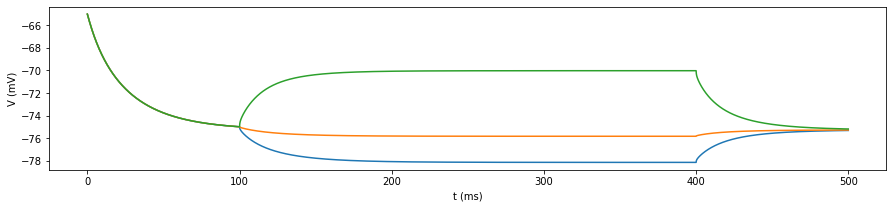

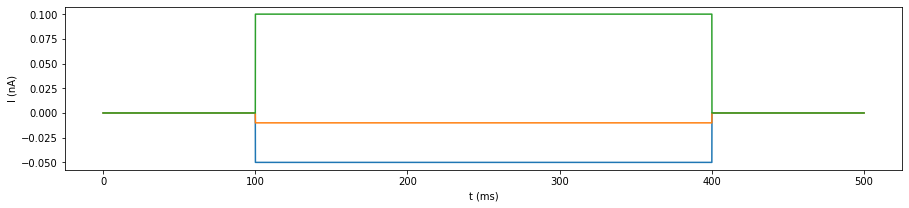

In [5]:
# Inject current steps into the soma
stim_ampl = [- 0.05, - 0.01, 0.1]

# Define plots
fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for sa in stim_ampl:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = sa    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

In [6]:
list_t = []
list_i = []
list_v = []

# Inject current steps into the soma
stim_ampl = [- 0.05, - 0.01, 0.1]

# Stimulation
for sa in stim_ampl: 
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = sa    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)
        
    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    list_t.append(list(rec_t))
    list_i.append(list(rec_i))
    list_v.append(list(rec_v_soma))

df_Cell1 = pd.DataFrame([list_t, list_i, list_v])

### Cell 1 - Protocole 2: Studying cell active properties: suprathreshold stimulation

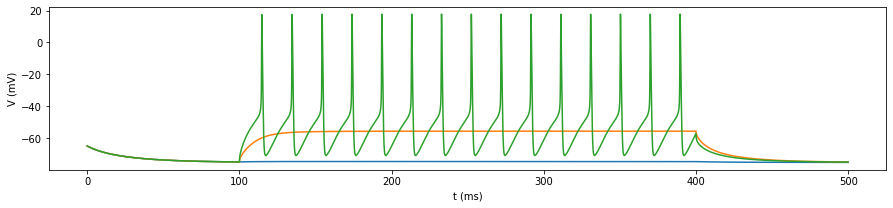

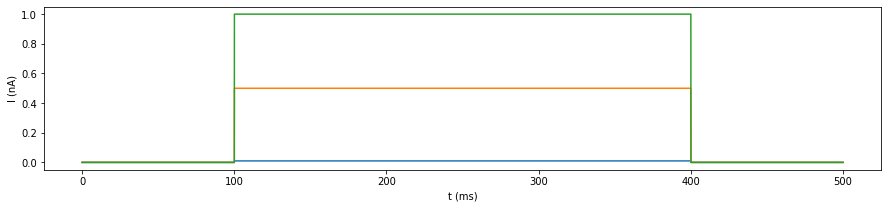

In [7]:
# Inject current steps into the soma
stim_ampl = [0.01, 0.5, 1.0]

# Define plots
fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for sa in stim_ampl:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = sa    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

## Cell 2

In [8]:
# Define NEURON_2 class with specific morphology and channel behavior

class NEURON_2:
    def __init__(self):
        self.build_morphology()
        self.define_biophysics()
        
    def build_morphology(self):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file('stdlib.hoc')
        h.load_file("import3d.hoc")
        #cell = h.Import3d_SWC_read() # We have a .swc morphology file
        cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input('Cell2_g3.asc')

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell,0)
        self.importedcell.instantiate(None) 

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.basal = []
        self.apical = []
        #self.axonal = [] # for the moment we will forget about the axon
        self.all = []
        for sec in h.allsec():
            #print (sec)
            if 'soma' in sec.name():
                self.somatic.append(sec)
            if 'dend' in sec.name():
                self.basal.append(sec)
            if 'apic' in sec.name():
                self.apical.append(sec)
            #if 'axon' in sec.name():
            #    self.axonal.append(sec)
    
    def define_biophysics(self):
        """
        Distributes passive mechanisms and the different types
        of ion channels on the soma and dendrites
        """
        # Define passive properties
        # You can try to change the passice properties and see what happens
        for sec in h.allsec():
            sec.Ra = 100
            sec.cm = 1
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75
                
        # Define active properties for soma and dendrites (basal and apical)
        for sec in self.somatic:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
          
        for sec in self.apical:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
        
        for sec in self.basal:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1

In [9]:
# Instantiate the cell
Cell2 = NEURON_2()


17519 lines read


### Cell 2 - Protocole 1: Studying cell passive properties - subthreshold stimulation


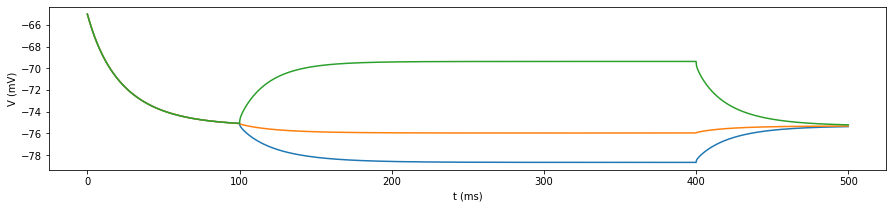

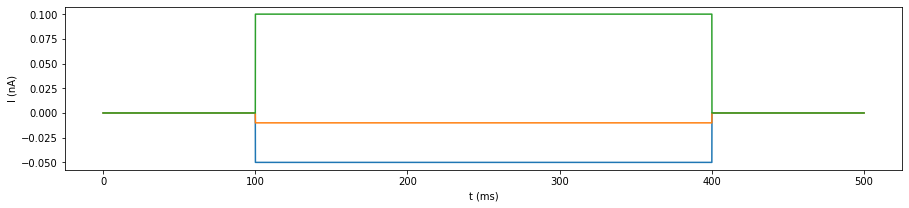

In [10]:
# Inject current steps into the soma
stim_ampl = [- 0.05, - 0.01, 0.1]

# Define plots
fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for sa in stim_ampl:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell2.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = sa    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell2.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

In [11]:
list_t = []
list_i = []
list_v = []

# Inject current steps into the soma
stim_ampl = [- 0.05, - 0.01, 0.1]

# Stimulation
for sa in stim_ampl: 
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell2.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = sa    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell2.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)
        
    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    list_t.append(list(rec_t))
    list_i.append(list(rec_i))
    list_v.append(list(rec_v_soma))

df_Cell2 = pd.DataFrame([list_t, list_i, list_v])

### Cell 2 - Protocole 2: Studying cell active properties: suprathreshold stimulation

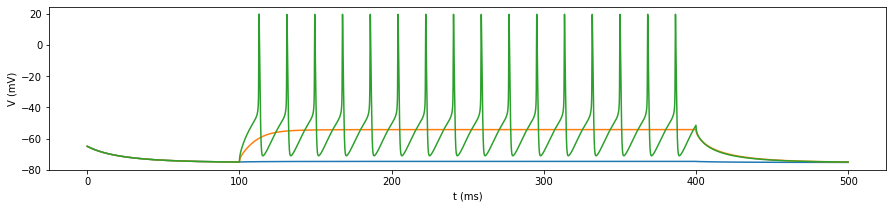

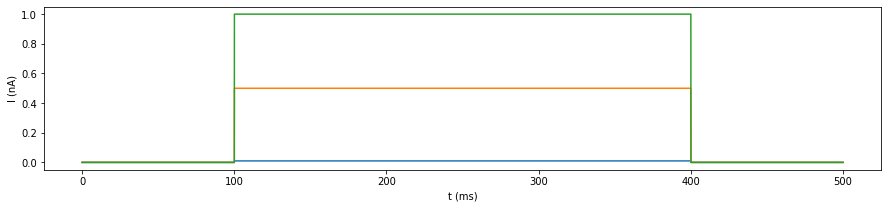

In [12]:
# Inject current steps into the soma
stim_ampl = [0.01, 0.5, 1.0]

# Define plots
fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for sa in stim_ampl:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell2.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = sa    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell2.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

# 2. Find the most interesting traces (those with peaks)

In [13]:
# Check the 3 traces from Cell1
for i in range(3):
    i0 = np.array(df_Cell1.loc[1,i])
    peaks_time, _ = find_peaks(i0, prominence=1, height=-20)
    print('Cell 1 - Trace', i, ':', peaks_time)

# Check the 3 traces from Cell2
for i in range(3):
    i0 = np.array(df_Cell2.loc[1,i])
    peaks_time, _ = find_peaks(i0, prominence=1, height=-20)
    print('Cell 2 - Trace', i, ':', peaks_time)

Cell 1 - Trace 0 : []
Cell 1 - Trace 1 : []
Cell 1 - Trace 2 : []
Cell 2 - Trace 0 : []
Cell 2 - Trace 1 : []
Cell 2 - Trace 2 : []


We can see that the "find_peaks" function does not give any result for all our traces (of the 2 cells). We deduce that there are no peaks in our signals and we will focus on a restricted group of features. Because indeed the peaks allow us to obtain information such as AP amplitudes, essential for the differentiation of our cells, but we will try to differentiate them without that. 

# 3. Focus on one trace to select the correct eFeatures

To choose the eFeatures, I went through the eFEL documentation and selected all those which have all the "required features". In the end, it's like selecting all the voltage features of the documentation:

- steady_state_voltage_stimend
- steady_state_voltage
- voltage_base
- decay_time_constant_after_stim
- sag_time_constant
- sag_amplitude 
- sag_ratio1
- sag_ratio2
- ohmic_input_resistance
- ohmic_input_resistance_vb_ssse
- voltage_deflection_vb_ssse
- voltage_deflection
- voltage_deflection_begin
- voltage_after_stim
- minimum_voltage
- maximum_voltage
- maximum_voltage_from_voltagebase

Peak_time was also necessary to deduce stim_start and stim_end but in our case we can easily see on the previous plots that the signals are between 100 and 400ms.

In [14]:
# Defien the start/end of the stimulation
stim_start = 100 # in ms
stim_end = 400

# Focus on the first trace of the second cell (arbitrarily chosen)
t0 = np.array(df_Cell2.loc[0,0])
v0 = np.array(df_Cell2.loc[2,0])
trace = {'T': t0, 'V': v0, 'stim_start': [stim_start], 'stim_end': [stim_end]}

In [15]:
eFEL_features = ['steady_state_voltage_stimend',
                 'steady_state_voltage',
                 'voltage_base',
                 'decay_time_constant_after_stim',
                 'minimum_voltage',
                 'sag_time_constant',
                 'voltage_deflection_vb_ssse',
                 'sag_amplitude',
                 'sag_ratio1',
                 'sag_ratio2',
                 'voltage_deflection',
                 'ohmic_input_resistance',
                 'ohmic_input_resistance_vb_ssse',
                 'voltage_deflection_begin',
                 'voltage_after_stim',
                 'maximum_voltage',
                 'maximum_voltage_from_voltagebase'
                ]

In [16]:
feature_values = efel.getFeatureValues([trace], eFEL_features)[0]
feature_values #Simple display because 'None' values may not be well handled by a json display

/usr/local/lib/python3.8/dist-packages/efel/api.py:499: RuntimeWarning: Error while calculating feature sag_time_constant: 
Feature [decay_start_after_stim] is missing

Feature [decay_end_after_stim] is missing

sag time constant: Not enough data points to compute time constant.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/efel/api.py:499: RuntimeWarning: Error while calculating feature ohmic_input_resistance: Parameter [stimulus_current] is missing in double map. In the python interface this can be set using the setDoubleSetting() function

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/efel/api.py:499: RuntimeWarning: Error while calculating feature ohmic_input_resistance_vb_ssse: Parameter [stimulus_current] is missing in double map. In the python interface this can be set using the setDoubleSetting() function

  warnings.warn(


{'steady_state_voltage_stimend': array([-78.67846016]),
 'steady_state_voltage': array([-76.04194461]),
 'voltage_base': array([-75.0384852]),
 'decay_time_constant_after_stim': array([22.58650413]),
 'minimum_voltage': array([-78.67853341]),
 'sag_time_constant': None,
 'voltage_deflection_vb_ssse': array([-3.63997496]),
 'sag_amplitude': array([7.3243247e-05]),
 'sag_ratio1': array([2.01215047e-05]),
 'sag_ratio2': array([0.99997988]),
 'voltage_deflection': array([-5.8120466]),
 'ohmic_input_resistance': None,
 'ohmic_input_resistance_vb_ssse': None,
 'voltage_deflection_begin': array([-4.77749145]),
 'voltage_after_stim': array([-75.77960847]),
 'maximum_voltage': array([-75.19116177]),
 'maximum_voltage_from_voltagebase': array([-0.15267657])}

We can now remove the eFeatures that gives None values pr possible error and warning.

In [17]:
eFEL_features_corrected = [  'steady_state_voltage_stimend',
                             'steady_state_voltage',
                             'voltage_base',
                             'minimum_voltage',
                             'voltage_deflection_vb_ssse',
                             'sag_ratio2',
                             'voltage_deflection',
                             'voltage_deflection_begin',
                             'voltage_after_stim',
                             'maximum_voltage',
                             'maximum_voltage_from_voltagebase'
                            ]
feature_values = efel.getFeatureValues([trace], eFEL_features_corrected)[0]
# The 'None' values have been handle so we can make a json display (more
feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}
IPython.display.HTML(json2html.convert(json=feature_values))

steady_state_voltage_stimend,-78.67846016319002
steady_state_voltage,-76.04194461075227
voltage_base,-75.03848519897635
minimum_voltage,-78.67853340643698
voltage_deflection_vb_ssse,-3.6399749642136783
sag_ratio2,0.9999798784953428
voltage_deflection,-5.812046601593721
voltage_deflection_begin,-4.777491447567073
voltage_after_stim,-75.77960847114186
maximum_voltage,-75.19116176983601
maximum_voltage_from_voltagebase,-0.15267657085966846


# 4. Combine the data for each traces of both cells 

In [18]:
# Create one traces array per cells
traces_Cell1 = []
traces_Cell2 = []

# Define the begining and end of the stimulation
stim_start = 100 # in ms
stim_end = 400

# Cell 1
trace1_1 = {'T': np.array(df_Cell1.loc[0,0]), 'V': np.array(df_Cell1.loc[2,0]), 'stim_start': [stim_start], 'stim_end': [stim_end]}
traces_Cell1.append(trace1_1)

trace1_2 = {'T': np.array(df_Cell1.loc[0,1]), 'V': np.array(df_Cell1.loc[2,1]), 'stim_start': [stim_start], 'stim_end': [stim_end]}
traces_Cell1.append(trace1_2)

trace1_3 = {'T': np.array(df_Cell1.loc[0,2]), 'V': np.array(df_Cell1.loc[2,2]), 'stim_start': [stim_start], 'stim_end': [stim_end]}
traces_Cell1.append(trace1_3)

# Cell 2
trace2_1 = {'T': np.array(df_Cell2.loc[0,0]), 'V': np.array(df_Cell2.loc[2,0]), 'stim_start': [stim_start], 'stim_end': [stim_end]}
traces_Cell2.append(trace2_1)

trace2_2 = {'T': np.array(df_Cell2.loc[0,1]), 'V': np.array(df_Cell2.loc[2,1]), 'stim_start': [stim_start], 'stim_end': [stim_end]}
traces_Cell2.append(trace2_2)

trace2_3 = {'T': np.array(df_Cell2.loc[0,2]), 'V': np.array(df_Cell2.loc[2,2]), 'stim_start': [stim_start], 'stim_end': [stim_end]}
traces_Cell2.append(trace2_3)

# 5. Differenciate our cells with eFeatures

For this part, I used the corrrect eFeatures define above and compute these features for each trace of both cells.

In [19]:
# Create list to store the data for the 3 traces per cells
steady_state_voltage_stimend_Cell1 = [];
steady_state_voltage_Cell1 = [];
voltage_base_Cell1 = [];
minimum_voltage_Cell1 = [];
voltage_deflection_vb_ssse_Cell1 = [];
sag_ratio2_Cell1 = [];
voltage_deflection_Cell1 = [];
voltage_deflection_begin_Cell1 = [];
voltage_after_stim_Cell1 = [];
maximum_voltage_Cell1 = [];
maximum_voltage_from_voltagebase_Cell1 = [];

for trace in traces_Cell1:
    feature_values = efel.getFeatureValues([trace], eFEL_features_corrected)[0]
    steady_state_voltage_stimend_Cell1.append(feature_values['steady_state_voltage_stimend'])
    steady_state_voltage_Cell1.append(feature_values['steady_state_voltage'])
    voltage_base_Cell1.append(feature_values['voltage_base'])
    minimum_voltage_Cell1.append(feature_values['minimum_voltage'])
    voltage_deflection_vb_ssse_Cell1.append(feature_values['voltage_deflection_vb_ssse'])
    sag_ratio2_Cell1.append(feature_values['sag_ratio2'])
    voltage_deflection_Cell1.append(feature_values['voltage_deflection'])
    voltage_deflection_begin_Cell1.append(feature_values['voltage_deflection_begin'])
    voltage_after_stim_Cell1.append(feature_values['voltage_after_stim'])
    maximum_voltage_Cell1.append(feature_values['maximum_voltage'])
    maximum_voltage_from_voltagebase_Cell1.append(feature_values['maximum_voltage_from_voltagebase'])

In [20]:
# Create list to store the data for the 3 traces per cells
steady_state_voltage_stimend_Cell2 = [];
steady_state_voltage_Cell2 = [];
voltage_base_Cell2 = [];
minimum_voltage_Cell2 = [];
voltage_deflection_vb_ssse_Cell2 = [];
sag_ratio2_Cell2 = [];
voltage_deflection_Cell2 = [];
voltage_deflection_begin_Cell2 = [];
voltage_after_stim_Cell2 = [];
maximum_voltage_Cell2 = [];
maximum_voltage_from_voltagebase_Cell2 = [];

for trace in traces_Cell2:
    feature_values = efel.getFeatureValues([trace], eFEL_features_corrected)[0]
    steady_state_voltage_stimend_Cell2.append(feature_values['steady_state_voltage_stimend'])
    steady_state_voltage_Cell2.append(feature_values['steady_state_voltage'])
    voltage_base_Cell2.append(feature_values['voltage_base'])
    minimum_voltage_Cell2.append(feature_values['minimum_voltage'])
    voltage_deflection_vb_ssse_Cell2.append(feature_values['voltage_deflection_vb_ssse'])
    sag_ratio2_Cell2.append(feature_values['sag_ratio2'])
    voltage_deflection_Cell2.append(feature_values['voltage_deflection'])
    voltage_deflection_begin_Cell2.append(feature_values['voltage_deflection_begin'])
    voltage_after_stim_Cell2.append(feature_values['voltage_after_stim'])
    maximum_voltage_Cell2.append(feature_values['maximum_voltage'])
    maximum_voltage_from_voltagebase_Cell2.append(feature_values['maximum_voltage_from_voltagebase'])

Now that we have all are data we are going to plot to see which features are great to differenciate our cells.

Text(0.5, 1.0, 'steady_state_voltage_stimend')

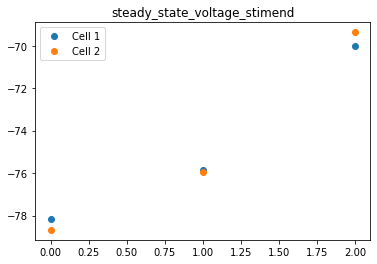

In [21]:
plt.plot(steady_state_voltage_stimend_Cell1,'o',label="Cell 1")
plt.plot(steady_state_voltage_stimend_Cell2,'o',label="Cell 2")
plt.legend()
plt.title("steady_state_voltage_stimend")

Text(0.5, 1.0, 'steady_state_voltage')

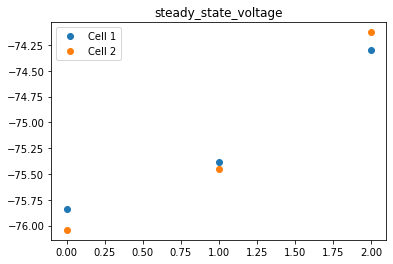

In [22]:
plt.plot(steady_state_voltage_Cell1,'o',label="Cell 1")
plt.plot(steady_state_voltage_Cell2,'o',label="Cell 2")
plt.legend()
plt.title("steady_state_voltage")

Text(0.5, 1.0, 'voltage_base')

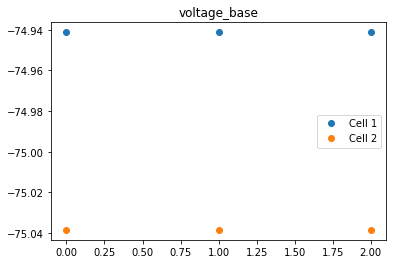

In [23]:
plt.plot(voltage_base_Cell1,'o',label="Cell 1")
plt.plot(voltage_base_Cell2,'o',label="Cell 2")
plt.legend()
plt.title("voltage_base")

Text(0.5, 1.0, 'minimum_voltage')

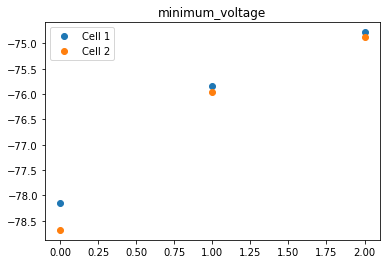

In [24]:
plt.plot(minimum_voltage_Cell1,'o',label="Cell 1")
plt.plot(minimum_voltage_Cell2,'o',label="Cell 2")
plt.legend()
plt.title("minimum_voltage")

Text(0.5, 1.0, 'maximum_voltage')

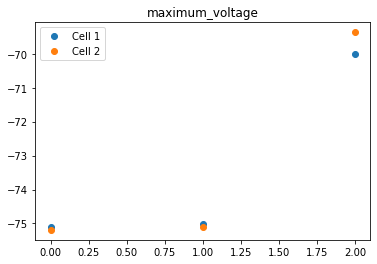

In [25]:
plt.plot(maximum_voltage_Cell1,'o',label="Cell 1")
plt.plot(maximum_voltage_Cell2,'o',label="Cell 2")
plt.legend()
plt.title("maximum_voltage")

Text(0.5, 1.0, 'maximum_voltage_from_voltagebase')

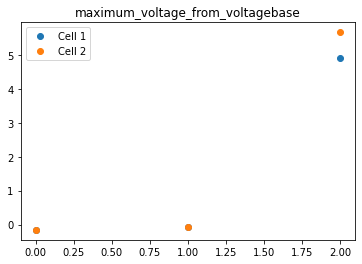

In [26]:
plt.plot(maximum_voltage_from_voltagebase_Cell1,'o',label="Cell 1")
plt.plot(maximum_voltage_from_voltagebase_Cell2,'o',label="Cell 2")
plt.legend()
plt.title("maximum_voltage_from_voltagebase")

Text(0.5, 1.0, 'voltage_deflection_vb_ssse')

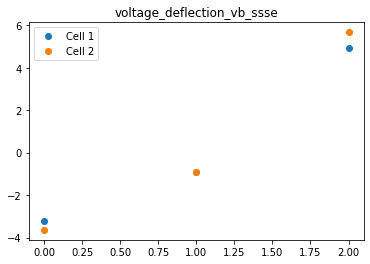

In [27]:
plt.plot(voltage_deflection_vb_ssse_Cell1,'o',label="Cell 1")
plt.plot(voltage_deflection_vb_ssse_Cell2,'o',label="Cell 2")
plt.legend()
plt.title("voltage_deflection_vb_ssse")

Text(0.5, 1.0, 'sag_ratio2')

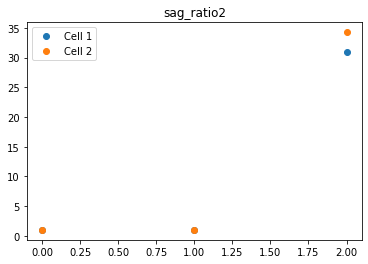

In [28]:
plt.plot(sag_ratio2_Cell1,'o',label="Cell 1")
plt.plot(sag_ratio2_Cell2,'o',label="Cell 2")
plt.legend()
plt.title("sag_ratio2")

Text(0.5, 1.0, 'voltage_deflection')

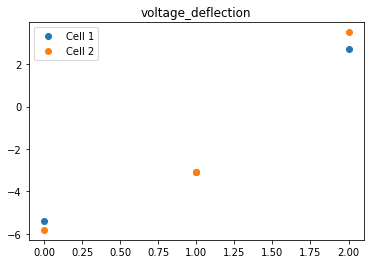

In [29]:
plt.plot(voltage_deflection_Cell1,'o',label="Cell 1")
plt.plot(voltage_deflection_Cell2,'o',label="Cell 2")
plt.legend()
plt.title("voltage_deflection")

Text(0.5, 1.0, 'voltage_deflection_begin')

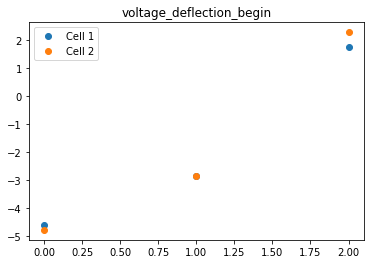

In [30]:
plt.plot(voltage_deflection_begin_Cell1,'o',label="Cell 1")
plt.plot(voltage_deflection_begin_Cell2,'o',label="Cell 2")
plt.legend()
plt.title("voltage_deflection_begin")

Text(0.5, 1.0, 'voltage_after_stim')

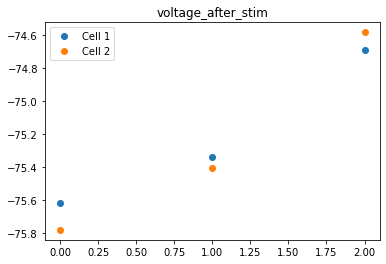

In [31]:
plt.plot(voltage_after_stim_Cell1,'o',label="Cell 1")
plt.plot(voltage_after_stim_Cell2,'o',label="Cell 2")
plt.legend()
plt.title("voltage_after_stim")

From the plots above we can see that the only eFeature that differenciate our two cells is the `voltage_base`. For the Cell1 the voltage_Base is at -74.94 mV for the three traces, whereas the traces from Cell2 with a voltage_base of -75.04 mV.

Conserning the other features, the differentiation is less clear. The only one that might be interesting is `minimum_voltage` because we can see that the values from Cell1 are always bigger than Cell2. But still, we would need more traces to conclude on this feature utility. 

Finally, I put in a dataframe the values for the three traces of both cells concerning the 2 eFeatures selectionned `voltage_base` and `minimum_voltage`.

In [32]:
df_diff = pd.DataFrame({'voltage_base_Cell1':voltage_base_Cell1, 
                        'voltage_base_Cell2':voltage_base_Cell2, 
                        'minimum_voltage_Cell1':minimum_voltage_Cell1,
                        'minimum_voltage_Cell2':minimum_voltage_Cell2
                       })
df_diff

,voltage_base_Cell1,voltage_base_Cell2,minimum_voltage_Cell1,minimum_voltage_Cell2
0,[-74.94118961066405],[-75.03848519897635],[-78.15338422912474],[-78.67853340643698]
1,[-74.94118961066405],[-75.03848519897635],[-75.836283162619],[-75.96888475939497]
2,[-74.94118961066405],[-75.03848519897635],[-74.78179149607848],[-74.87296591558032]


To conclude, this DataFrame allows use to conclude that Cell1 can be differenciate from Cell2 thanks to 2 features `voltage_base` and `minimum_voltage`. For both of this eFeatures Cell1 has bigger values than Cell2. 

# <font color= 'red'>Ex3:</font> Genetic Algorith (Optimisation)

<font size='3'>Change the GA code in such a way that instead of the Spikecount feature, we search for a solution with AP amplitude of 96 for stim_amp = 0.5 nA and AP amplitdue of 85 for stim_amp = 0.05 nA.
    
<font size='3'>As you can see the optimisation algoithm explained in the tutorial is very simple and gives a lot of possible solutions. Explain and demonstrate how can you modify the GA optimisation to better contrain the returned solution. <font color= 'red'>[2 pts]
    

In [1]:
# Load usefull packages
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
from neuron import h

# Cretae ball and stick model
# Create sections
soma = h.Section(name='soma')
dend = h.Section(name='dend')

# Topology
dend.connect(soma(1))
# Geometry
soma.L = soma.diam = 12.6157 # microns
dend.L = 200                 # microns
dend.diam = 1                # microns
h.define_shape() # Translate into 3D points.

# Biophysics
for sec in h.allsec():
    sec.Ra = 100    # Axial resistance in Ohm * cm
    sec.cm = 1      # Membrane capacitance in micro Farads / cm^2

# Insert active Hodgkin-Huxley current in the soma
# Now we won't include the values for gkbar and gnabar
soma.insert('hh')
for seg in soma:
    #seg.hh.gnabar = 0.25  # Sodium conductance in S/cm2. [0, 1]
    #seg.hh.gkbar = 0.1  # Potassium conductance in S/cm2. [0, 1]
    seg.hh.gl = 0.0003    # Leak conductance in S/cm2
    seg.hh.el = -54.3     # Reversal potential in mV

# Insert passive current in the dendrite
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.001  # Passive conductance in S/cm2
    seg.pas.e = -65    # Leak reversal potential mV

--No graphics will be displayed.


In [2]:
import efel

# Create a function of the simulation that will give us the result for the different population members
def stimulation(amp):
    stim = h.IClamp(soma(0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 50     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(soma(0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(200)
    
    trace = {'T': rec_t, 'V': rec_v_soma, 'stim_start': [100], 'stim_end': [200]}

    feature_values = efel.getFeatureValues([trace], ['AP_amplitude'])[0]
    if (feature_values['AP_amplitude'] is None):
        return 0
    else:
        return feature_values['AP_amplitude'][0]
    

# RUN to test
value = stimulation(0.9)
print(value)
    

92.30667257948484


First, we create a random population

In [3]:
import random
import numpy as np
import efel

def create_starting_population(gna_min, gna_max, gk_min, gk_max, pop_size):
    # Set up an initial array of all zeros
    population = np.zeros((pop_size, 2))
    for p in range(pop_size):
        gna = random.uniform(gna_min, gna_max)
        gk = random.uniform(gk_min, gk_max)
        population[p][0] = gna
        population[p][1] = gk
    return population

# RUN to test
gna_min = 0
gna_max = 1
gk_min = 0
gk_max = 1
pop_size = 10

pop = create_starting_population(gna_min, gna_max, gk_min, gk_max, pop_size)
print (pop)

[[0.76041115 0.24049456]
 [0.55004193 0.66615478]
 [0.84745854 0.32024112]
 [0.74978228 0.5975015 ]
 [0.04126642 0.04260552]
 [0.33750154 0.92686743]
 [0.54556715 0.35022796]
 [0.3915366  0.02671473]
 [0.04076068 0.96551409]
 [0.40133857 0.63530683]]


Now we compute the fitness depending on the target AP amplitude.

In [18]:
def calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2):
    scores = []
    for pop in population:
        gna = pop[0]
        gk = pop[1]
        # Introduce mechanisms in the ball and stick model
        soma.insert('hh')
        for seg in soma:
            seg.hh.gnabar = gna  # Sodium conductance in S/cm2. [0, 1]
            seg.hh.gkbar = gk  # Potassium conductance in S/cm2. [0, 1]
        fits = []
        for g, st in zip([goal1, goal2], [stim_amp1, stim_amp2]):
            value = stimulation(st)
            fit = np.abs(g - int(value))
            fits.append(fit)
        scores.append(np.mean(fits))
    return scores



In [5]:
def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)
    
    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    # Identify individual with smallest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness <= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    # Return winner
    return population[winner, :]

# RUN to test
parent1 = select_individual_by_tournament(pop, fit_scor)
parent2 = select_individual_by_tournament(pop, fit_scor)
parent3 = select_individual_by_tournament(pop, fit_scor)
parent4 = select_individual_by_tournament(pop, fit_scor)
parent5 = select_individual_by_tournament(pop, fit_scor)
parent6 = select_individual_by_tournament(pop, fit_scor)
print(parent1)
print(parent2)
print(parent3)
print(parent4)
print(parent5)
print(parent6)

[0.76041115 0.24049456]
[0.76041115 0.24049456]
[0.76041115 0.24049456]
[0.76041115 0.24049456]
[0.84745854 0.32024112]
[0.40133857 0.63530683]


In [6]:
def breed_by_crossover(parent_1, parent_2):
    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0],parent_2[1]))  
    child_2 = np.hstack((parent_1[1],parent_2[0]))    
    # Return children
    return child_1, child_2

child1, child2 = breed_by_crossover(parent1, parent2)
child3, child4 = breed_by_crossover(parent3, parent4)
child5, child6 = breed_by_crossover(parent5, parent6)

print (child1)
print (child2)
print (child3)
print (child4)
print (child5)
print (child6)

[0.76041115 0.24049456]
[0.24049456 0.76041115]
[0.76041115 0.24049456]
[0.24049456 0.76041115]
[0.84745854 0.63530683]
[0.32024112 0.40133857]


In [7]:
def randomly_mutate_population(population, mutation_probability):  
    for p in population:
        filt = random.random()
        if filt < mutation_probability:
            # Apply random mutation
            gna = random.uniform(0, 1)
            p[0] = gna
            gk = random.uniform(0, 1)
            p[1] = gk
        else:
            pass
    # Return mutation population
    return population

#RUN to test
new_pop = np.stack((child1, child2))
print (new_pop)

mut_pop = randomly_mutate_population(new_pop, 0.25)
print (mut_pop)


[[0.76041115 0.24049456]
 [0.24049456 0.76041115]]
[[0.76041115 0.24049456]
 [0.24049456 0.76041115]]


Starting best score: 8.5 (gna = 0.59, gk = 0.63)
Starting best score: 8.5 (gna = 0.67, gk = 0.75)
Starting best score: 8.5 (gna = 0.47, gk = 0.32)
Starting best score: 8.5 (gna = 0.93, gk = 0.97)
Starting best score: 8.5 (gna = 0.70, gk = 0.56)
Starting best score: 8.5 (gna = 0.69, gk = 0.83)
Starting best score: 8.5 (gna = 0.40, gk = 0.23)
Generation 0 best score: 8.5 (gna = 0.46, gk = 0.59)
Generation 0 best score: 8.5 (gna = 0.52, gk = 0.47)
Generation 0 best score: 8.5 (gna = 0.52, gk = 0.53)
Generation 0 best score: 8.5 (gna = 0.93, gk = 0.98)
Generation 0 best score: 8.5 (gna = 0.40, gk = 0.56)
Generation 0 best score: 8.5 (gna = 0.47, gk = 0.52)
Generation 1 best score: 8.5 (gna = 0.63, gk = 0.59)
Generation 1 best score: 8.5 (gna = 0.47, gk = 0.46)
Generation 1 best score: 8.5 (gna = 0.52, gk = 0.59)
Generation 1 best score: 8.5 (gna = 0.47, gk = 0.46)
Generation 1 best score: 8.5 (gna = 0.47, gk = 0.47)
Generation 1 best score: 8.5 (gna = 0.52, gk = 0.52)
Generation 1 best sco

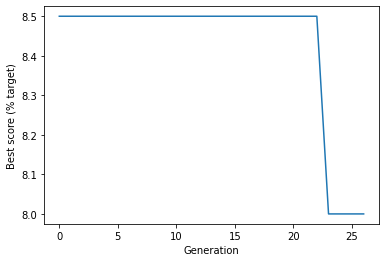

In [13]:
# Set general parameters
population_size = 20
maximum_generation = 5
best_score_progress = [] # Tracks progress
gna_min = 0.0
gna_max = 1.0
gk_min = 0.0
gk_max = 1.0
stim_amp2 = 0.5 # nA
goal2 = 96 # 
stim_amp2 = 0.05 # nA
goal2 = 85 # 
# Create starting population
# RUN
population = create_starting_population(gna_min, gna_max, gk_min, gk_max, population_size)

# Display best score in starting population
fit_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2)
best_score = np.min(fit_scores)

for i in range(len(fit_scores)):
    if fit_scores[i] == best_score:
        gna = population[i][0]
        gk = population[i][1]
        print ('Starting best score: %.1f (gna = %.2f, gk = %.2f)' %(best_score, gna, gk))
        best_score_progress.append(best_score)
    
# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, fit_scores)
        parent_2 = select_individual_by_tournament(population, fit_scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.0020
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    pop_scores = calculate_fitness(population, goal1, stim_amp1, goal2, stim_amp2)
    best_score = np.min(pop_scores)
    
    for i in range(len(pop_scores)):
        if pop_scores[i] == best_score:
            gna = population[i][0]
            gk = population[i][1]
            print ('Generation %s best score: %.1f (gna = %.2f, gk = %.2f)' %(generation, best_score, gna, gk))
            best_score_progress.append(best_score)
        
# GA has completed required generation

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()

According to our results, we would chose a gna of 0.56 and gk of 0.97 for our model, as it is the min of the "error". However, note that a lot of different possibilities exist for the conductance leading to a similar AP amplitude. This proves that the GA is simple and can be optimized to narrow the possibilities. 

An important aspect if we want to optimize the parameter according to a given AP amplitude is that depending on the current that is injected in the cell, there will not always be an AP. For example, with a simtulation amplitude of 0.05nA, there are only very few APs that are induced. This is taken care of in the 'stimulation' function: the AP amplitude is 0 if there are no APs induced by the stimulation. 

This might explain the bad score that we get at the end: it is hard to get an AP amplitude of 85 when most AP are not present. 

Now, let's observe the cell behavior with the optimal fetures (gk and gna)


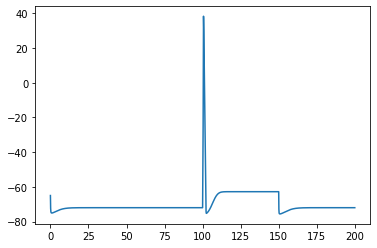

In [17]:
soma.insert('hh')
for seg in soma:
    seg.hh.gnabar = 0.56  # Sodium conductance in S/cm2. [0, 1]
    seg.hh.gkbar = 0.97 # Potassium conductance in S/cm2. [0, 1]


stim = h.IClamp(soma(0.5))         
stim.delay = 100   # stim delay (ms)
stim.dur = 50     # stim duration (ms)
stim.amp = 0.5    # stim amplitude (nA)    
# Initialize NEURON vectors to record time, voltage and current
# time vector
rec_t = h.Vector()
rec_t.record(h._ref_t)
# membrame potential vector
rec_v_soma = h.Vector()
rec_v_soma.record(soma(0.5)._ref_v)
# current
rec_i = h.Vector()
rec_i.record(stim._ref_i)
# Initialize and run a simulation
h.load_file('stdrun.hoc')
h.finitialize(-65)
h.continuerun(200)


fig=plt.figure()
plt.plot(rec_t, rec_v_soma)
plt.show()

We indeed get an amplitude that is close to the solution (96 for a stimulation of 0.5nA) but not exactly equal.

To better constraint the solution, we could add other goals to use to optimize the parameters. Indeed, many different combinaiton of gna and gk lead to similar AP amplitude. Therefore, it is hard to use only thisparameter to optimize the conductance. We could for example try to constrain the cell using the spikecount, so that it spikes only a specific number of time. Additionally, we could try to set the time to hyperpolarize as another goal. By adding more constraints, we should narrow the number of solutions for the conductances. 